# Table of Contents

## 1. Comparing Loyalty and Purchase Frequency
## 2. Grouping Products Based on Price Range
## 3. Analysis of Bulk Purchases
## 4. Customers Per Region

# Importing Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

In [2]:
# importing dfs

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\02 Data\Prepared Data'

df_1 = pd.read_pickle(os.path.join(path, 'cust_ords_prods_prior_3.pkl'))

df_2 = pd.read_pickle(os.path.join(path, 'dep_cust_profile.pkl'))

In [3]:
# eliminating column and row restrictions

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# checking head of df_1

df_1.head(100).sort_values(by = 'order_id')

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_period_of_day,order_attribute,max_order,loyalty_flag,mean_price,spending_class,median_order_interval,frequent_customer,first_name,last_name,gender,state,Age,date_joined,n_dependants,fam_status,income,mean_price_updated,spending_class_updated,region,low_activity_customer_?,department
72,62373,21,5,1,14,7.0,48988,14,1,Unsweetened Premium Iced Tea,94,7,5.7,Mid-range product,Busiest Days,Most orders,return_order,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,7.012683,Low spender,West,0.0,beverages
92,62373,21,5,1,14,7.0,44375,13,0,Canned Aranciata Orange,77,7,3.9,Low-range product,Busiest Days,Most orders,return_order,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,7.012683,Low spender,West,0.0,beverages
68,62373,21,5,1,14,7.0,24186,12,1,Slim Can Pink Grapefruit Natural Mineral Water,115,7,3.0,Low-range product,Busiest Days,Most orders,return_order,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,7.012683,Low spender,West,0.0,beverages
53,86918,19,9,5,16,8.0,34690,2,1,100% Juice Apple Juice,98,7,1.0,Low-range product,Regularly Busy,Most orders,return_order,9,New customer,8.372059,Low spender,6.0,Frequent customer,Jane,Salazar,Female,Louisiana,62,2017-02-03,1,married,151988,8.372059,Low spender,South,0.0,beverages
71,129152,21,4,1,14,14.0,48988,4,1,Unsweetened Premium Iced Tea,94,7,5.7,Mid-range product,Busiest Days,Most orders,return_order,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,7.012683,Low spender,West,0.0,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,return_order,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest Days,Most orders,return_order,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
17,487368,15,22,1,10,14.0,196,1,1,Soda,77,7,9.0,Mid-range product,Busiest Days,Most orders,return_order,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,3.980556,Low spender,Midwest,0.0,beverages
69,497940,21,26,1,11,10.0,24186,3,1,Slim Can Pink Grapefruit Natural Mineral Water,115,7,3.0,Low-range product,Busiest Days,Most orders,return_order,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,7.012683,Low spender,West,0.0,beverages
85,497940,21,26,1,11,10.0,48988,2,1,Unsweetened Premium Iced Tea,94,7,5.7,Mid-range product,Busiest Days,Most orders,return_order,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,7.012683,Low spender,West,0.0,beverages


In [5]:
# checking head of df_2

df_2.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


# 1. Comparing Loyalty and Purchase Frequency

In [6]:
# grouping users by loyalty and purchase frequency, then aggregating price, max order, and days since prior order

loyalty_frequent_customer = df_1.groupby(['user_id', 'loyalty_flag', 'frequent_customer']).agg({'prices' : 'sum', 'max_order' : 'mean', 'days_since_prior_order' : 'mean'})

loyalty_frequent_customer.head()

,,,prices,max_order,days_since_prior_order
user_id,loyalty_flag,frequent_customer,,,
1,New customer,Non-frequent customer,375.7,10.0,20.259259
10,New customer,Non-frequent customer,1237.1,5.0,20.746377
100,New customer,Non-frequent customer,266.2,5.0,26.320000
1000,New customer,Frequent customer,866.0,7.0,11.647727
10000,Loyal customer,Frequent customer,8785.6,72.0,4.949580


In [7]:
# resetting index

loyalty_frequent_customer = loyalty_frequent_customer.reset_index()

In [8]:
# renaming variables for clarity

loyalty_frequent_customer.loc[loyalty_frequent_customer['frequent_customer'] == 'Frequent customer', 'frequent_customer'] = 'Frequent purchaser'
loyalty_frequent_customer.loc[loyalty_frequent_customer['frequent_customer'] == 'Regular customer', 'frequent_customer'] = 'Regular purchaser'
loyalty_frequent_customer.loc[loyalty_frequent_customer['frequent_customer'] == 'Non-frequent customer', 'frequent_customer'] = 'Non-frequent purchaser'

In [9]:
# concat'ing loyalty flag and frequent customer column to create one overaching profile column

loyalty_frequent_customer['loyalty_purchase_frequency'] = loyalty_frequent_customer['loyalty_flag'].str.cat(loyalty_frequent_customer['frequent_customer'], sep=', ')

In [10]:
# viewing result

loyalty_frequent_customer.head()

,user_id,loyalty_flag,frequent_customer,prices,max_order,days_since_prior_order,loyalty_purchase_frequency
0,1,New customer,Non-frequent purchaser,375.7,10.0,20.259259,"New customer, Non-frequent purchaser"
1,10,New customer,Non-frequent purchaser,1237.1,5.0,20.746377,"New customer, Non-frequent purchaser"
2,100,New customer,Non-frequent purchaser,266.2,5.0,26.320000,"New customer, Non-frequent purchaser"
3,1000,New customer,Frequent purchaser,866.0,7.0,11.647727,"New customer, Frequent purchaser"
4,10000,Loyal customer,Frequent purchaser,8785.6,72.0,4.949580,"Loyal customer, Frequent purchaser"


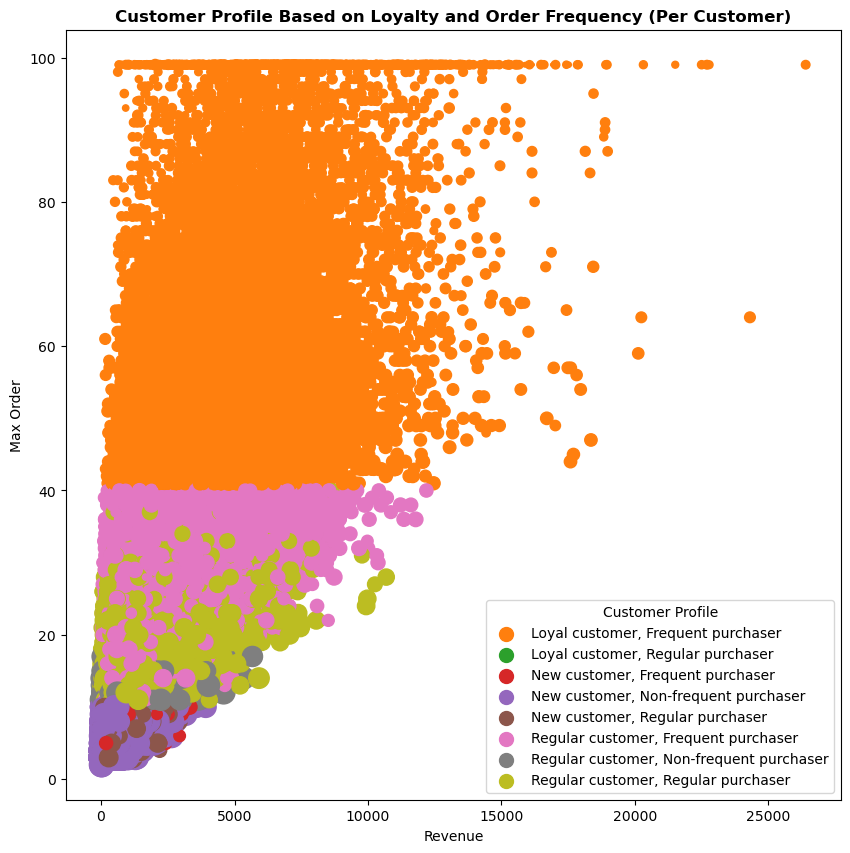

In [11]:
# Defining a color map for the loyalty status categories per customer

cmap = plt.get_cmap('tab20')
loyalty_status_colors = {
    'Loyal customer, Frequent purchaser': cmap(0.1),
    'Loyal customer, Regular purchaser': cmap(0.2),
    'New customer, Frequent purchaser': cmap(0.3),
    'New customer, Non-frequent purchaser': cmap(0.4),
    'New customer, Regular purchaser': cmap(0.5),
    'Regular customer, Frequent purchaser': cmap(0.6),
    'Regular customer, Non-frequent purchaser': cmap(0.7),
    'Regular customer, Regular purchaser': cmap(0.8)
}

colors = loyalty_frequent_customer['loyalty_purchase_frequency'].map(loyalty_status_colors)

# creating scatter plot

scatter_loyalty_order_frequency = ax = loyalty_frequent_customer.plot(kind='scatter', x='prices', y='max_order', s=loyalty_frequent_customer['days_since_prior_order']*10, color = colors, figsize = (10,10))

ax.set_title('Customer Profile Based on Loyalty and Order Frequency (Per Customer)', fontweight = 'bold')
ax.set_ylabel('Max Order')
ax.set_xlabel('Revenue')

# creating legend

handles = [plt.scatter([], [], s=100, marker='o', color=cmap(0.1)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.2)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.3)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.4)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.5)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.6)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.7)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.8))]
                
labels = [
    'Loyal customer, Frequent purchaser',
    'Loyal customer, Regular purchaser',
    'New customer, Frequent purchaser',
    'New customer, Non-frequent purchaser',
    'New customer, Regular purchaser',
    'Regular customer, Frequent purchaser',
    'Regular customer, Non-frequent purchaser',
    'Regular customer, Regular purchaser'
    
]

ax.legend(handles, labels, title = 'Customer Profile', loc = 'lower right')

# exporting

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\04 Analysis\Visualizations\4.10 Supplemental' 

scatter_loyalty_order_frequency.figure.savefig(os.path.join(path, 'scatter_loyalty_order_frequency.png'))

In [12]:
# ordering habits per loyalty flag

df_1.groupby(['loyalty_flag']).agg({'orders_day_of_week' : 'mean', 'order_hour_of_day' : 'mean', 'days_since_prior_order' : 'mean'})


,orders_day_of_week,order_hour_of_day,days_since_prior_order
loyalty_flag,,,
Loyal customer,2.791642,13.188346,6.026656
New customer,2.697449,13.673824,17.976936
Regular customer,2.720970,13.480738,12.155135


# 2. Grouping Products Based on Price Range

In [13]:
# crosstab of price_range frequency by department

price_range_frequency = pd.crosstab(df_1['department'], df_1['price_range'])

price_range_frequency

price_range,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,35243,118453
babies,0,125317,298485
bakery,0,287938,884490
beverages,0,852974,1835149
breakfast,0,219333,483700
bulk,0,1221,33352
canned goods,0,298683,769375
dairy eggs,5127,1431016,3962604
deli,0,313628,737621


In [14]:
# adding commas to numbers

price_range_frequency = price_range_frequency.applymap(lambda x: '{:,}'.format(x))

price_range_frequency

price_range,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,"35,243","118,453"
babies,0,"125,317","298,485"
bakery,0,"287,938","884,490"
beverages,0,"852,974","1,835,149"
breakfast,0,"219,333","483,700"
bulk,0,"1,221","33,352"
canned goods,0,"298,683","769,375"
dairy eggs,"5,127","1,431,016","3,962,604"
deli,0,"313,628","737,621"


In [15]:
# clipboarding table

price_range_frequency.to_clipboard()

# 3. Analysis of Bulk Purchases

In [16]:
# creating subset of df_1

df_bp = df_1[['order_id', 'add_to_cart_order', 'prices', 'loyalty_flag', 'frequent_customer']]

df_bp.head()

,order_id,add_to_cart_order,prices,loyalty_flag,frequent_customer
0,2539329,1,9.0,New customer,Non-frequent customer
1,2398795,1,9.0,New customer,Non-frequent customer
2,473747,1,9.0,New customer,Non-frequent customer
3,2254736,1,9.0,New customer,Non-frequent customer
4,431534,1,9.0,New customer,Non-frequent customer


In [17]:
# transforming with max 'order to cart'

df_bp['max_order'] = df_bp.groupby('order_id')['add_to_cart_order'].transform(max)

C:\Users\Charles Yi\AppData\Local\Temp\ipykernel_23272\3414444033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['max_order'] = df_bp.groupby('order_id')['add_to_cart_order'].transform(max)


In [18]:
# comparing max_add_to_cart_order with loyalty and purchase frequency

max_orders = df_bp.groupby(['loyalty_flag', 'frequent_customer']).agg({'max_order' : 'mean', 'prices' : 'mean'})

max_orders

max_order    prices
loyalty_flag     frequent_customer                         
Loyal customer   Frequent customer      15.563807  7.773687
                 Regular customer       18.783208  7.494629
New customer     Frequent customer      15.253301  7.813431
                 Non-frequent customer  15.723175  7.790228
                 Regular customer       15.509898  7.806426
Regular customer Frequent customer      15.574810  7.805922
                 Non-frequent customer  16.279413  7.762946
                 Regular customer       16.292426  7.790466

In [19]:
# resetting index

max_orders = max_orders.reset_index()

max_orders

,loyalty_flag,frequent_customer,max_order,prices
0,Loyal customer,Frequent customer,15.563807,7.773687
1,Loyal customer,Regular customer,18.783208,7.494629
2,New customer,Frequent customer,15.253301,7.813431
3,New customer,Non-frequent customer,15.723175,7.790228
4,New customer,Regular customer,15.509898,7.806426
5,Regular customer,Frequent customer,15.574810,7.805922
6,Regular customer,Non-frequent customer,16.279413,7.762946
7,Regular customer,Regular customer,16.292426,7.790466


In [20]:
# editing frequent_customer column for clarity

def purchaser (row):
    if row['frequent_customer'] == 'Frequent customer':
        return 'Frequent purchaser'
    elif row['frequent_customer'] == 'Regular customer':
        return 'Regular purchaser'
    elif row['frequent_customer'] == 'Non-frequent customer':
        return 'Non-frequent purchaser'

max_orders['frequent_customer'] = max_orders.apply(purchaser, axis = 1)

max_orders

,loyalty_flag,frequent_customer,max_order,prices
0,Loyal customer,Frequent purchaser,15.563807,7.773687
1,Loyal customer,Regular purchaser,18.783208,7.494629
2,New customer,Frequent purchaser,15.253301,7.813431
3,New customer,Non-frequent purchaser,15.723175,7.790228
4,New customer,Regular purchaser,15.509898,7.806426
5,Regular customer,Frequent purchaser,15.574810,7.805922
6,Regular customer,Non-frequent purchaser,16.279413,7.762946
7,Regular customer,Regular purchaser,16.292426,7.790466


In [21]:
# concat'ing loyalty and frequent customer columns

max_orders['loyalty_purchase'] = max_orders['loyalty_flag'].str.cat(max_orders['frequent_customer'], sep = (', '))

max_orders

,loyalty_flag,frequent_customer,max_order,prices,loyalty_purchase
0,Loyal customer,Frequent purchaser,15.563807,7.773687,"Loyal customer, Frequent purchaser"
1,Loyal customer,Regular purchaser,18.783208,7.494629,"Loyal customer, Regular purchaser"
2,New customer,Frequent purchaser,15.253301,7.813431,"New customer, Frequent purchaser"
3,New customer,Non-frequent purchaser,15.723175,7.790228,"New customer, Non-frequent purchaser"
4,New customer,Regular purchaser,15.509898,7.806426,"New customer, Regular purchaser"
5,Regular customer,Frequent purchaser,15.574810,7.805922,"Regular customer, Frequent purchaser"
6,Regular customer,Non-frequent purchaser,16.279413,7.762946,"Regular customer, Non-frequent purchaser"
7,Regular customer,Regular purchaser,16.292426,7.790466,"Regular customer, Regular purchaser"


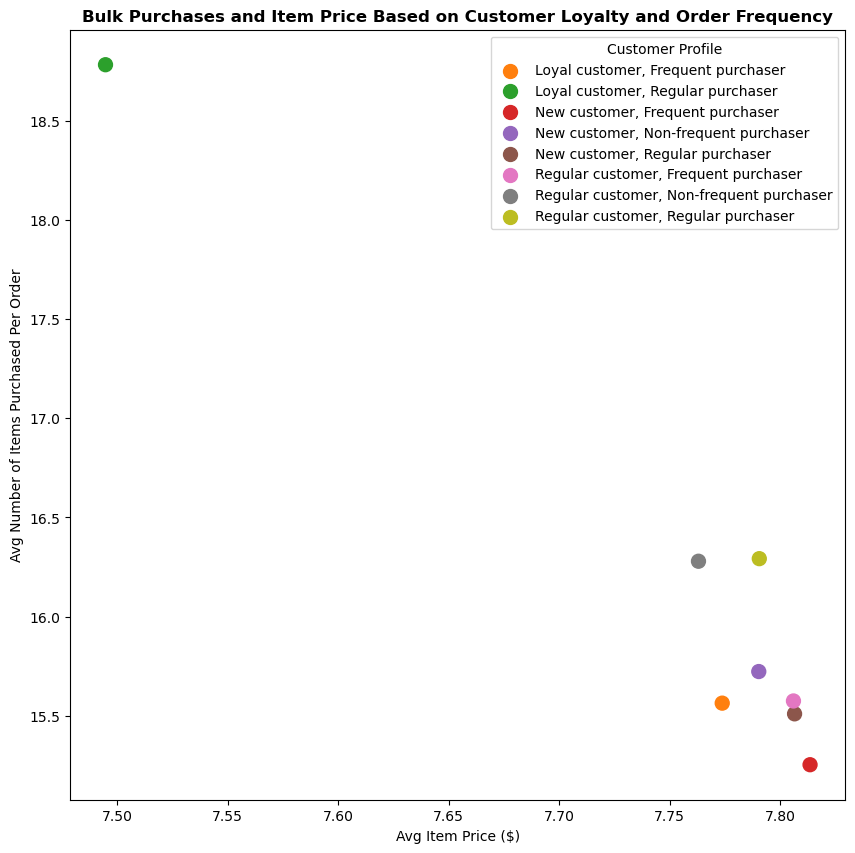

In [22]:
# creating scatter based on max_order and prices

# assigning and mapping color 

cmap = plt.get_cmap('tab20')

colors = {'Loyal customer, Frequent purchaser': cmap(0.1),
    'Loyal customer, Regular purchaser': cmap(0.2),
    'New customer, Frequent purchaser': cmap(0.3),
    'New customer, Non-frequent purchaser': cmap(0.4),
    'New customer, Regular purchaser': cmap(0.5),
    'Regular customer, Frequent purchaser': cmap(0.6),
    'Regular customer, Non-frequent purchaser': cmap(0.7),
    'Regular customer, Regular purchaser': cmap(0.8)}

map_colors = max_orders['loyalty_purchase'].map(colors)

# creating scatter chart

scatter_max_orders = ax = max_orders.plot(kind = 'scatter', x = 'prices', y = 'max_order', color = map_colors, s = 100, figsize = (10,10))

# setting titles and labels

ax.set_title('Bulk Purchases and Item Price Based on Customer Loyalty and Order Frequency', fontweight = 'bold')
ax.set_xlabel('Avg Item Price ($)')
ax.set_ylabel('Avg Number of Items Purchased Per Order')

# creating handles and labels for legend

handles = [plt.scatter([], [], s=100, marker='o', color=cmap(0.1)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.2)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.3)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.4)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.5)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.6)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.7)),
    plt.scatter([], [], s=100, marker='o', color=cmap(0.8))]
                
labels = [
    'Loyal customer, Frequent purchaser',
    'Loyal customer, Regular purchaser',
    'New customer, Frequent purchaser',
    'New customer, Non-frequent purchaser',
    'New customer, Regular purchaser',
    'Regular customer, Frequent purchaser',
    'Regular customer, Non-frequent purchaser',
    'Regular customer, Regular purchaser'
    
]

ax.legend(handles, labels, title = 'Customer Profile', loc = 'upper right')

# exporting

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\04 Analysis\Visualizations\4.10 Supplemental' 

scatter_max_orders.figure.savefig(os.path.join(path, 'scatter_max_orders.png'))



# 4. Customers Per Region

In [23]:
# unique count of customers per region

region_customer_count = df_1.groupby('region').agg({'user_id' : 'nunique'}).rename(columns = {'user_id' : 'customer_count'})

In [24]:
# sorting by user_id count

region_customer_count = region_customer_count.sort_values(by = 'customer_count', ascending = True)

In [25]:
# viewing result

region_customer_count

,customer_count
region,
Northeast,36388
Midwest,48519
West,52565
South,68737


In [26]:
# indexing

region_customer_count = region_customer_count.reset_index()

region_customer_count

,region,customer_count
0,Northeast,36388
1,Midwest,48519
2,West,52565
3,South,68737


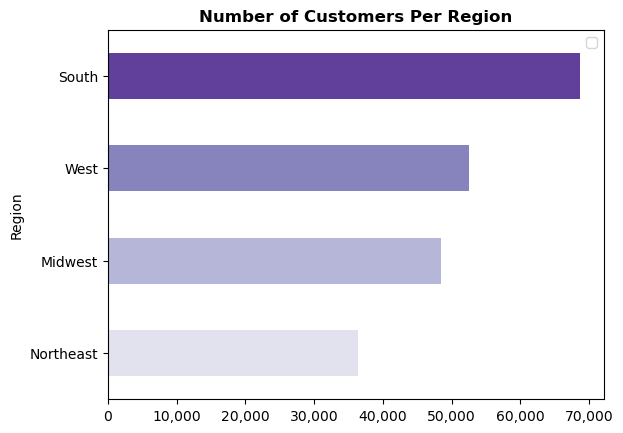

In [27]:
# plotting chart

# setting color map

cmap = plt.get_cmap('Purples_r')

colors = {'South' : cmap(0.2),
         'West' : cmap(0.4),
         'Midwest' : cmap(0.6),
         'Northeast' : cmap(0.8)}

colors_region = region_customer_count['region'].map(colors)

# creating chart

bar_region_customer_count = ax = region_customer_count.plot(kind = 'barh', x = 'region', y = 'customer_count', color = colors_region)

ax.set_title('Number of Customers Per Region', fontweight = 'bold')
ax.set_ylabel('Region')
ax.legend('')

# formatting x-axis ticks

def comma (x, pos):
    return '{:,.0f}'.format(x)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(comma))

# exporting

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\04 Analysis\Visualizations\4.10 Supplemental' 

bar_region_customer_count.figure.savefig(os.path.join(path, 'bar_region_customer_count.png'))